* # Análisis exploratorio sobre un dataset que contiene la cantidad de toques dentreo del area de un jugador en la PREMIER LEAGUE - 19/20 
* # Podemos hacer lo siguientes análisis
    * ## Análisis de impacto en el equipo.
    * ## Análisis de rendimiento por posición.
    * ## Análisis de comparación de jugadores u equipos.
    * ## Por ultimo Predicción de goles por toques en el area(para eso tendre que agregar uno por uno los goles convertidos por cada jugador por que no encontre ningun dataset que contenga los goleadores de la temporada 19/20)
    
    ----
* #### PAGINA DONDE SACAMOS LOS GOLES DE ALGUNOS JUGADORES Y AGREGAREMOS MANUALMENTE. https://www.sport.es/es/resultados/2019-2020/premier-league/maximos-goleadores/

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("./toques-area-EPL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           100 non-null    int64  
 1   Player Name     100 non-null    object 
 2   Position        100 non-null    object 
 3   Team            100 non-null    object 
 4   Touches in Box  100 non-null    int64  
 5   Starts          100 non-null    int64  
 6   Minutes Played  100 non-null    int64  
 7   Fouled          100 non-null    int64  
 8   goles           56 non-null     float64
dtypes: float64(1), int64(5), object(3)
memory usage: 7.2+ KB


In [3]:
data.head()

,index,Player Name,Position,Team,Touches in Box,Starts,Minutes Played,Fouled,goles
0,0,Salah,Forward,Liverpool,248,33,2876,18,19.0
1,1,Sterling,Forward,M. City,239,30,2651,40,20.0
2,2,Zaha,Forward,Crystal Palace,192,37,3280,120,4.0
3,3,Roberto Firmino,Forward,Liverpool,184,34,2988,16,9.0
4,4,Raúl Jiménez,Forward,Wolves,171,37,3236,35,17.0


* Vamos a modificar los nombres de las columnas asi se entiende mas.
-----

In [4]:
data = data.rename(columns={"Player Name":"jugadores","Position":"posicion","Team":"equipo",
                           "Touches in Box":"toques_area","Starts":"comienzo",
                            "Minutes Played":"minutos_jugados", "Fouled":"foul_recibido"})

In [5]:
data.describe()

,index,toques_area,comienzo,minutos_jugados,foul_recibido,goles
count,100.000000,100.00000,100.000000,100.000000,100.000000,56.000000
mean,49.500000,88.12000,26.080000,2304.070000,33.950000,9.428571
std,29.011492,42.50877,7.824695,672.247899,23.927658,6.032811
min,0.000000,44.00000,6.000000,764.000000,9.000000,0.000000
25%,24.750000,55.00000,21.000000,1841.750000,18.000000,4.750000
50%,49.500000,75.50000,26.500000,2299.500000,29.000000,8.500000
75%,74.250000,116.25000,32.000000,2869.250000,40.250000,13.250000
max,99.000000,248.00000,38.000000,3420.000000,167.000000,23.000000


**Observación** 
* La media de toques en el area de los 100 jugadores es de %88.16
* La media de goles es de 9.42 
* La media de minutos jugados es de 2304' 
* La media de foul recibido es de 34 por cada jugador
------

In [6]:
data.isna().sum()

index               0
jugadores           0
posicion            0
equipo              0
toques_area         0
comienzo            0
minutos_jugados     0
foul_recibido       0
goles              44
dtype: int64

* Tenemos los valores nulos de los jugadores que no cargamos los goles o que no convirtieron.
----

In [7]:
data["goles"] = data["goles"].fillna(0).astype(int)
#data["goles"] = data["goles"].astype(int)

* Pasaremos lo valores N/A a 0 y luego los numero de goles pasarlos a numero enteros.
---

In [8]:
import seaborn as sns

C:\Users\Acer\AppData\Local\Temp\ipykernel_8592\2085987848.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_EPL = data.corr()


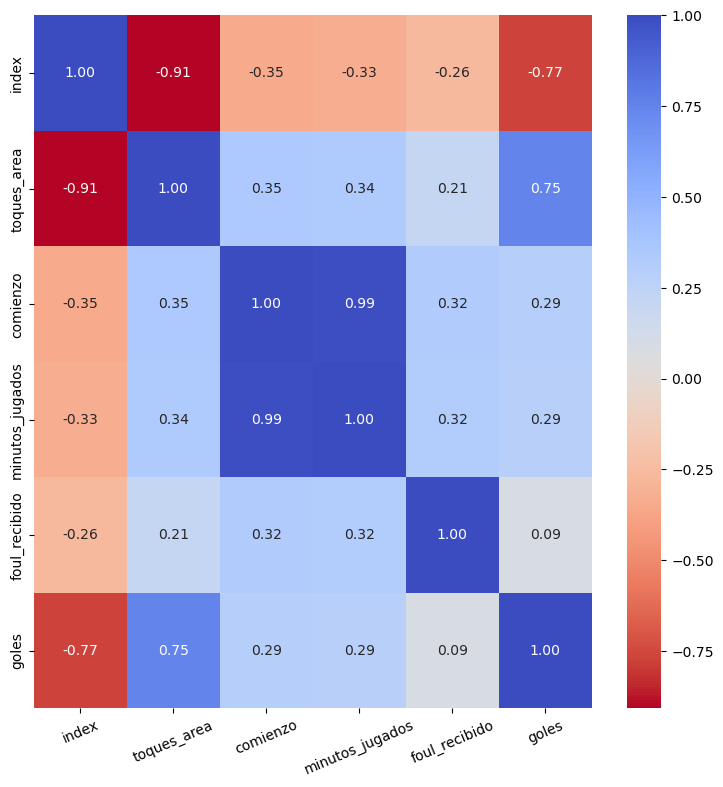

In [9]:
#### ##### ### Creamos la correlacion entre variables y la graficamos con la libreria seaborn 
correlacion_EPL = data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlacion_EPL , annot=True , fmt ='.2f',
            cmap=plt.cm.coolwarm_r)
plt.xticks(rotation=23)
plt.show()

**Observación** 
* ***Las variables con mayor correlacion son las siguientes:***
    * toques en el area y goles = 0.75
    * minutos jugados con el comienzo del partido = 0.99
    * comoienzo de partido con toques en el area = 0.35
    * toques en el area y minutos jugados = 0.34
    * foul recibido junto a comienzo y minutos jugados = 0.32
    * goles junto a comienzo y minutos jugados = 0.29
    * foul recibidos y toques en el area = 0.21
    * Por ultimo el mas baja de las correlaciones positivas es goles y foul recibido = 0.09

**Dandole una redación rapida podemos entender que mas minutos de juego y comienzo del partido tiene mas posibilidades de tocar mas el area, recibe mas fouls y tiene mas posibilidades de gol**


----

In [10]:
posicion_dummy = pd.get_dummies(data["posicion"])
equipo_dummy = pd.get_dummies(data["equipo"])

In [11]:
print("posiciones"),print(posicion_dummy.sum())

posiciones
Defender      13
Forward       51
Midfielder    36
dtype: int64


(None, None)

**Observacion**
* Podemos ver que los delanteros tienen mas toques en el area de los principales 100 jugadores de la premier league
    * Delanteros = 51
    * Medio/volantes = 36
    * Defensores = 13
    ------

In [12]:
print("Cantdad de jugadores por equipos"),print(equipo_dummy.sum())

Cantdad de jugadores por equipos
Arsenal           3
Aston Villa       5
Bournemouth       5
Brighton          3
Burnley           4
Chelsea           6
Crystal Palace    5
Everton           8
Leicester         6
Liverpool         6
M. City           7
M. United         5
Newcastle         3
Norwich City      4
Sheffield Utd     7
Southampton       5
Tottenham         4
Watford           5
West Ham          4
Wolves            5
dtype: int64


(None, None)

**Observación**
* El equipo que tiene mas jugadores en toques dentro del area es el Everton con 8 jugadores
    * **Everton = 8 | Sheffield Utd = 7 - | M.city = 7 | LIVERPOOL = 6 | Chelsea & Leicester = 6**
    -----
    
    
* # PREDICCIONES.
---
* # Regresión lineal simple.

* ### Predicción del número de goles que un jugador marcará en función de la cantidad de toques que tenga en el área

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data[["toques_area"]]
y = data[["goles"]]

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=42) #Conjunto de training y test

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train , y_train)

LinearRegression()

In [18]:
y_pred = modelo_lineal.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print("MSE",mse)
print("R2",r2)

MSE 11.393190202719872
R2 0.7105388668008163


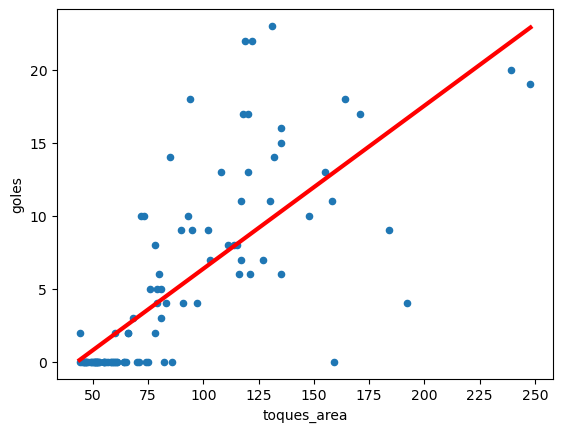

In [21]:
### #### Creamos una predicción general para luego hacer un grafico y demostrar la mejor predicción que creo el modelor
y_pred1 = modelo_lineal.predict(X)

### #### Creamos el grafico
data.plot(kind="scatter" , x="toques_area" , y="goles")
plt.plot(pd.DataFrame(data["toques_area"]) , y_pred1, c="red" , linewidth=3)

* **Linea roja** es la predicción y los **puntos azules** son los datos originales del dataset.


----
----
* ### Vemos que con una regresión lineal simple el modelo va algo positivo, teniendo en cuenta que podremos agregar mas variables predictoras e intentando otros modelos de predicciones
    * ### El valor de efectividad del modelo es de %71.05
    * ### el valor de 'MSE' es de %11.39 (mide la discrepancia entre los valores reales y las predicciones)
.-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------.
-----
---

* # PREDICCIÓN.
* # Regresión Lineal con mas variables predictoras.

In [22]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [23]:
#### #### Primero agregamos al dataset la variable posición que dumificamos 
data_dummy = pd.concat([data , posicion_dummy], axis=1)
data_dummy = data_dummy.drop(["posicion"], axis=1)

In [24]:
#### ### Lista de variables predictoras y a predecir
X1 = data_dummy[["toques_area","comienzo","minutos_jugados","foul_recibido","Defender","Forward","Midfielder"]]
Y = data_dummy["goles"]

In [25]:
#### #### le pediremos que nos elija las mejores variables para usar y crear el modelo
estimator = SVR(kernel="linear")
selector = RFE(estimator , n_features_to_select=4 , step=1)
selector = selector.fit(X1,Y)

In [26]:
#### Nos diga las mejores variables para usar
selector.ranking_

array([1, 2, 4, 3, 1, 1, 1])

In [27]:
X_pred = X1[["toques_area","Defender","Forward","Midfielder"]]

In [28]:
lm = LinearRegression()
lm.fit(X_pred , Y)

LinearRegression()

In [29]:
#### ### Dividimos otra vez en variable grupos y entrenamiento. 
X_train , X_test , y_train , y_test  = train_test_split(X_pred, Y, test_size=0.3 , random_state=42 )

In [30]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE:{mse}")
print(f"r2:{r2}")

MSE:9.369110815052174
r2:0.7619636479915607


* ### Podemos ver que el modelo con las variables seleccionadas por el **RFE**, Hizo mejorar un poco mas el modelo un 6% mas
    * ### El valor de efectividad del modelo ahora es de %76.19
    * ### el valor de 'MSE' es de %9.36 (mide la discrepancia entre los valores reales y las predicciones)
.------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----
* # Creamos una validación cruzada para ver como se comporta el modelo.

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [32]:
y_pred = cross_val_predict(lm , X_pred , Y , cv=99)
mae = mean_squared_error(Y , y_pred)
r2 = r2_score(Y , y_pred)


print(f"MAE: {mae}")
print(f"r2:{r2}")

MAE: 18.628196033569353
r2:0.555642054845966


* ### El modelo tiene un MAE de 18.60 y un R2 de 55.56, lo que sugiere que el modelo puede hacer predicciones precisas en promedio, pero todavía hay una cantidad significativa de variabilidad en los datos que no se explica por las variables predictoras utilizadas en el modelo.
-----
------------------

# Random Forest Regressor.

In [47]:
data_forest = data_forest.drop(["goles"], axis=1)

In [56]:
data_forest =pd.concat([data_forest,data["goles"]] , axis=1)
data_forest.head()

,index,jugadores,equipo,toques_area,comienzo,minutos_jugados,foul_recibido,Defender,Forward,Midfielder,goles
0,0,Salah,Liverpool,248,33,2876,18,0,1,0,19
1,1,Sterling,M. City,239,30,2651,40,0,1,0,20
2,2,Zaha,Crystal Palace,192,37,3280,120,0,1,0,4
3,3,Roberto Firmino,Liverpool,184,34,2988,16,0,1,0,9
4,4,Raúl Jiménez,Wolves,171,37,3236,35,0,1,0,17


In [90]:
predictoras = X1
target = data_forest[["goles"]]

In [91]:
from sklearn.ensemble import RandomForestRegressor 

In [92]:
X_train , X_test , y_train , y_test = train_test_split(predictoras , target ,test_size=0.3 , random_state=42)

In [93]:
### ### Creamos el modelo y lo entrenamos
random_forest = RandomForestRegressor(n_estimators=100 , random_state=42)
random_forest.fit(X_train , y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_8592\3004444391.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train , y_train)


RandomForestRegressor(random_state=42)

In [94]:
y_pred = random_forest.predict(X_test)

In [96]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficiente de determinación R2:", r2)
print("Error absoluto medio MAE:", mae)

Coeficiente de determinación R2: 0.630883722899729
Error absoluto medio MAE: 2.4083333333333328


# RESUMEN HASTA AHORA.
* ## El coeficiente de determinación R2 obtenido de 0.63 indica que el modelo de Random Forest Regressor explica aproximadamente el 63% de la variabilidad en la variable objetivo (en este caso, el porcentaje de goles). Por lo tanto, podemos decir que el modelo tiene un buen ajuste.


* ## El error absoluto medio MAE de 2.41 indica que, en promedio, las predicciones del modelo tienen un error absoluto de 2.41 puntos porcentuales en comparación con los valores reales de la variable objetivo.
    * ### Es decir que que modelor del Random Forest Regressor prece ser un buen predictor del porcentaje de goles, ya que tiene un coeficiente de determinación razonablemente alto y un error absoluto medio bajo. Sin embargo, aún puede haber espacio para mejorar el modelo utilizando técnicas.
    
# El trabajo lo seguire entre hoy y mañana solamente queria mostrar lo que estoy haciendo hasta ahora (lo empeze hoy 5/5/23)